### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

url = "https://raw.githubusercontent.com/FalkonGangrel/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/FalkonGangrel/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/FalkonGangrel/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/FalkonGangrel/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#Nomeando as lojas
loja1['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

for loja in [loja1, loja2, loja3, loja4]:
  loja.info()
  loja.head()
  loja.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  loja                    2359 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 239.7+ KB
<class 'pandas.core.frame.DataFram

#1. Análise do faturamento


In [31]:
# Adicionando faturamentos
faturamentoLoja1 = loja1['Preço'].sum()
faturamentoLoja2 = loja2['Preço'].sum()
faturamentoLoja3 = loja3['Preço'].sum()
faturamentoLoja4 = loja4['Preço'].sum()

# Dados de faturamento das lojas
nomesLojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores = ["yellow", "orange", "red", "purple"]
faturamentos = [faturamentoLoja1, faturamentoLoja2, faturamentoLoja3, faturamentoLoja4]


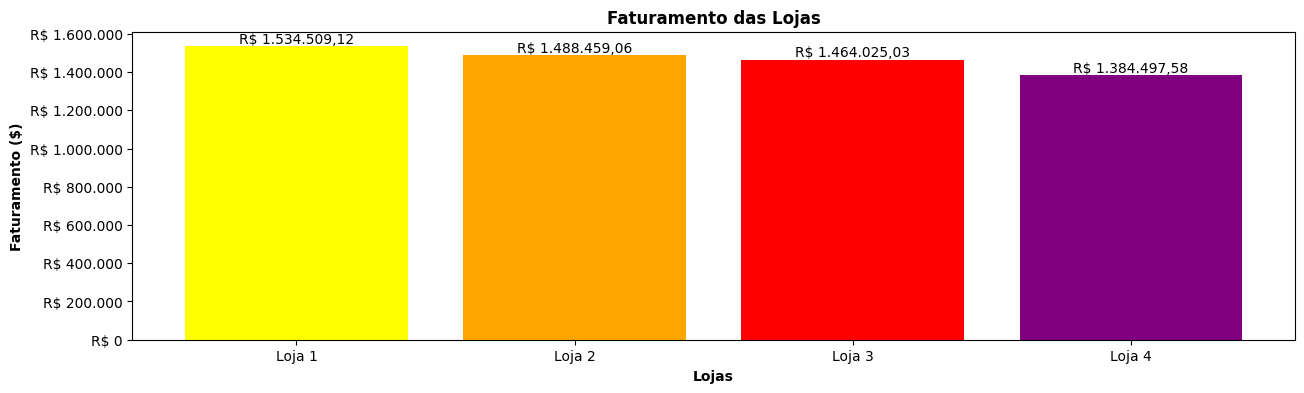

In [32]:
figure, ax = plt.subplots(figsize=(15, 4))

# Gráfico de barras com cores
grafico_faturamento = ax.bar(nomesLojas, faturamentos, color=cores)

# Título e rótulos dos eixos
ax.set_title('Faturamento das Lojas', fontweight='bold')
ax.set_xlabel('Lojas', fontweight='bold')
ax.set_ylabel('Faturamento ($)', fontweight='bold')

# Formatando os valores no eixo Y no formeto moeda BRL
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

# Rótulos nas barras com duas casas decimais
valores_formatados = [
    f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for x in faturamentos
]

ax.bar_label(grafico_faturamento, labels=valores_formatados, label_type='edge')

plt.show()

# 2. Vendas por Categoria


In [33]:
# Concatena todas as lojas
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [34]:
vendas_cat = pd.DataFrame({"Loja 1": loja1.groupby('Categoria do Produto')['Preço'].sum(),
                                     "Loja 2": loja2.groupby('Categoria do Produto')['Preço'].sum(),
                                     "Loja 3": loja3.groupby('Categoria do Produto')['Preço'].sum(),
                                     "Loja 4": loja4.groupby('Categoria do Produto')['Preço'].sum()})
vendas_cat.head()

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50


In [35]:
vendas_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, brinquedos to utilidades domesticas
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Loja 1  8 non-null      float64
 1   Loja 2  8 non-null      float64
 2   Loja 3  8 non-null      float64
 3   Loja 4  8 non-null      float64
dtypes: float64(4)
memory usage: 320.0+ bytes


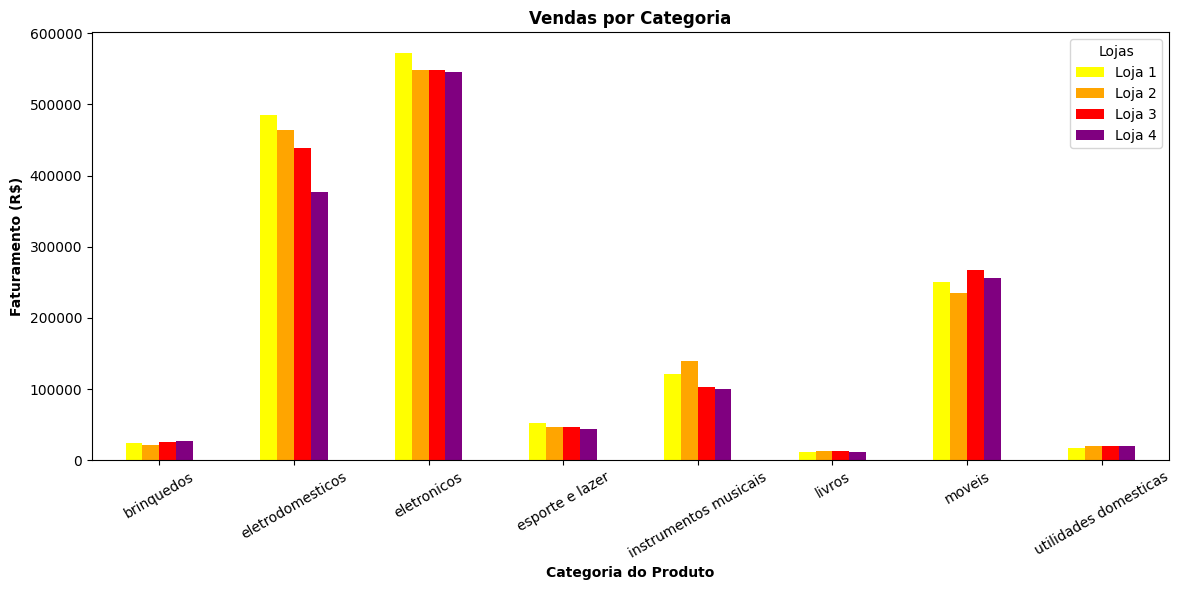

In [37]:
vendas_cat.plot(kind="bar", figsize=(12, 6), rot=30,
                          color=cores)
ax.yaxis.set_major_formatter(FuncFormatter(
    lambda x, _: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
))
plt.title("Vendas por Categoria", fontweight='bold')
plt.xlabel("Categoria do Produto", fontweight='bold')
plt.ylabel("Faturamento (R$)", fontweight='bold')

plt.legend(title='Lojas', loc='upper right')


plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
